In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('stroke.csv')

In [3]:
df.head()

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


Trying to seperate the dataset between the male and female ONLY for stroke diagnosis

In [6]:
stroke=df[df['Diagnosis']=='Stroke']
male=stroke[stroke['Gender']=='Male']
female=stroke[stroke['Gender']=='Female']

We try to see the differences between male and female in terms of stroke
But first we check if there is any missing data

In [5]:
male.isnull().sum()

Patient ID                    0
Patient Name                  0
Age                           0
Gender                        0
Hypertension                  0
Heart Disease                 0
Marital Status                0
Work Type                     0
Residence Type                0
Average Glucose Level         0
Body Mass Index (BMI)         0
Smoking Status                0
Alcohol Intake                0
Physical Activity             0
Stroke History                0
Family History of Stroke      0
Dietary Habits                0
Stress Levels                 0
Blood Pressure Levels         0
Cholesterol Levels            0
Symptoms                    616
Diagnosis                     0
dtype: int64

In [6]:
female.isnull().sum()

Patient ID                    0
Patient Name                  0
Age                           0
Gender                        0
Hypertension                  0
Heart Disease                 0
Marital Status                0
Work Type                     0
Residence Type                0
Average Glucose Level         0
Body Mass Index (BMI)         0
Smoking Status                0
Alcohol Intake                0
Physical Activity             0
Stroke History                0
Family History of Stroke      0
Dietary Habits                0
Stress Levels                 0
Blood Pressure Levels         0
Cholesterol Levels            0
Symptoms                    603
Diagnosis                     0
dtype: int64

In [7]:
male['Diagnosis'].value_counts()

Diagnosis
Stroke    3799
Name: count, dtype: int64

In [8]:
female['Diagnosis'].value_counts()

Diagnosis
Stroke    3669
Name: count, dtype: int64

Text(0.5, 1.0, 'Relation of gender to stroke')

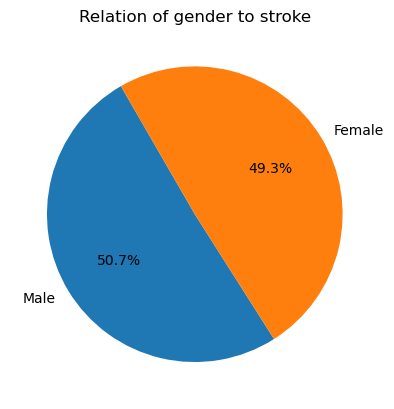

In [279]:
sizes=[3799,3699]
plt.pie(sizes,labels=('Male','Female'),autopct='%1.1f%%',startangle=120)
plt.title('Relation of gender to stroke')

Male has little higher trend to suffer stroke than woman.
Since the pie chart shows the male is only little higher than woman, i decided to combine and to explore other factors

In [10]:
df.columns

Index(['Patient ID', 'Patient Name', 'Age', 'Gender', 'Hypertension',
       'Heart Disease', 'Marital Status', 'Work Type', 'Residence Type',
       'Average Glucose Level', 'Body Mass Index (BMI)', 'Smoking Status',
       'Alcohol Intake', 'Physical Activity', 'Stroke History',
       'Family History of Stroke', 'Dietary Habits', 'Stress Levels',
       'Blood Pressure Levels', 'Cholesterol Levels', 'Symptoms', 'Diagnosis'],
      dtype='object')

I will try to correlate Work Type with Stroke

In [11]:
stroke['Work Type'].value_counts()

Work Type
Self-employed     1956
Private           1895
Government Job    1852
Never Worked      1765
Name: count, dtype: int64

Text(0, 0.5, 'Frequency of strokes')

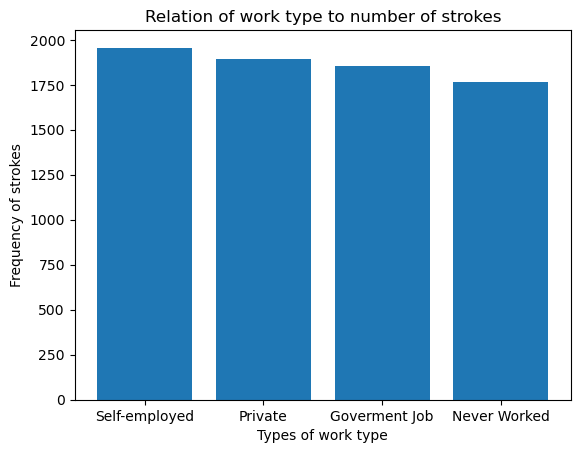

In [277]:
work_type=['Self-employed','Private','Goverment Job','Never Worked']
value_work_type=[1956,1895,1852,1765]
plt.bar(work_type,value_work_type)
plt.title('Relation of work type to number of strokes')
plt.xlabel('Types of work type')
plt.ylabel('Frequency of strokes')

Self employed have the highest stroke rate rather than those who never worked. This probably the stress of being independent workers that need to work hard to earn the self employement income

I will try to prove if the stress level correlate with Self employed issue

In [13]:
stroke.head()

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke
5,29307,Advika Kota,62,Female,0,0,Single,Private,Urban,91.60,...,Social Drinker,High,0,No,Gluten-Free,4.85,132/64,"HDL: 80, LDL: 69",Severe Fatigue,Stroke


1-3: Low Stress
4-7: Moderate Stress
8-10: High Stress

In [14]:
selfemployed=stroke[stroke['Work Type']=='Self-employed']

In [15]:
low_stress= selfemployed[(selfemployed['Stress Levels'] >= 0) & (selfemployed['Stress Levels'] <= 3.49)]
print(len(low_stress))


661


In [16]:
moderate_stress= selfemployed[(selfemployed['Stress Levels'] >= 3.5) & (selfemployed['Stress Levels'] <= 7.49)]
print(len(moderate_stress))

838


In [17]:
high_stress= selfemployed[(selfemployed['Stress Levels'] >= 7.5)]
print(len(high_stress))

457


Text(0, 0.5, 'Frequency of Strokes')

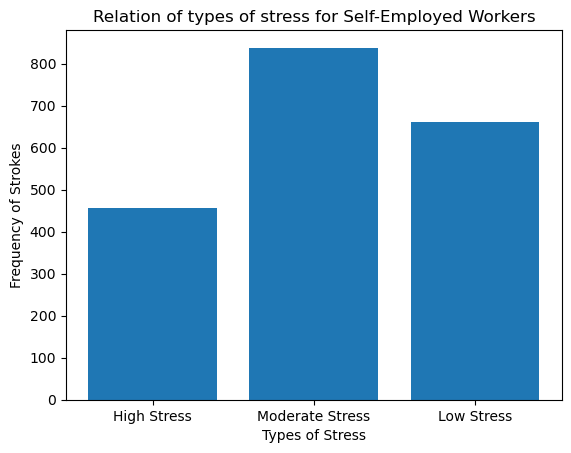

In [142]:
stress_names=['High Stress', 'Moderate Stress', 'Low Stress']
stress_value=[457,838,661]
plt.bar(stress_names,stress_value)
plt.title('Relation of types of stress for Self-Employed Workers')
plt.xlabel('Types of Stress')
plt.ylabel('Frequency of Strokes')

It seems most of self employed workers have moderate stress. Scientifically this wouldnt make sense as moderate stroke shouldn't have caused stroke. It is not excessive stress

Since self employement might need a lot movement and travel to work this might involve Physical Activity

In [19]:
df.columns


Index(['Patient ID', 'Patient Name', 'Age', 'Gender', 'Hypertension',
       'Heart Disease', 'Marital Status', 'Work Type', 'Residence Type',
       'Average Glucose Level', 'Body Mass Index (BMI)', 'Smoking Status',
       'Alcohol Intake', 'Physical Activity', 'Stroke History',
       'Family History of Stroke', 'Dietary Habits', 'Stress Levels',
       'Blood Pressure Levels', 'Cholesterol Levels', 'Symptoms', 'Diagnosis'],
      dtype='object')

In [20]:
selfemployed['Physical Activity'].value_counts()

Physical Activity
High        672
Low         661
Moderate    623
Name: count, dtype: int64

In [21]:
phy=['High Activity','Moderate Activity','Low Activity']
phyval=[672,623,661]

Text(0, 0.5, 'Frequency of Strokes')

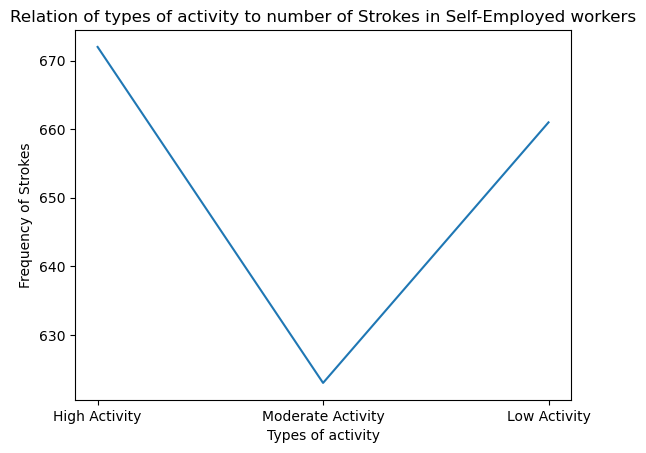

In [143]:
plt.plot(phy,phyval)
plt.title('Relation of types of activity to number of Strokes in Self-Employed workers')
plt.xlabel('Types of activity')
plt.ylabel('Frequency of Strokes')

Scientifically, more movement reduces stroke, thus this does not support the statement of why being selfemployed is high in stroke. 

I would like to dive into other factors that would bring clear light to factors of stroke to selfemployement

In [23]:
selfemployed['Family History of Stroke'].value_counts()

Family History of Stroke
Yes    994
No     962
Name: count, dtype: int64

Text(0, 0.5, 'Frequency of Strokes')

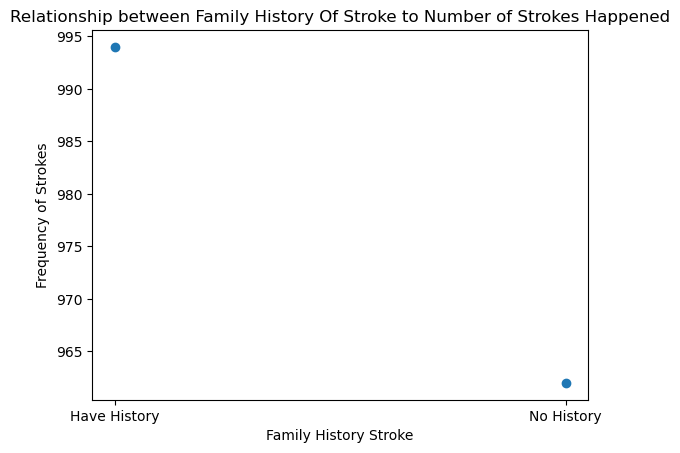

In [145]:
family=['Have History','No History']
famval=[994,962]
color=['yellow','blue']
plt.scatter(family,famval)
plt.title('Relationship between Family History Of Stroke to Number of Strokes Happened')
plt.xlabel('Family History Stroke')
plt.ylabel('Frequency of Strokes')

This can be a genetic factor playing a key role since it shows a drastic differences.

In [25]:
stroke['Hypertension'].value_counts()

Hypertension
0    5646
1    1822
Name: count, dtype: int64

In [26]:
stroke['Heart Disease'].value_counts()

Heart Disease
1    3763
0    3705
Name: count, dtype: int64

In [27]:
HD=['Have Heart Disease','No Heart Disease']
HDV=[3763,3705]
HT=['Have Hypertension','No Hypertension']
HTV=[1822,5646]



Text(0, 0.5, 'Freuqncy of Stroke')

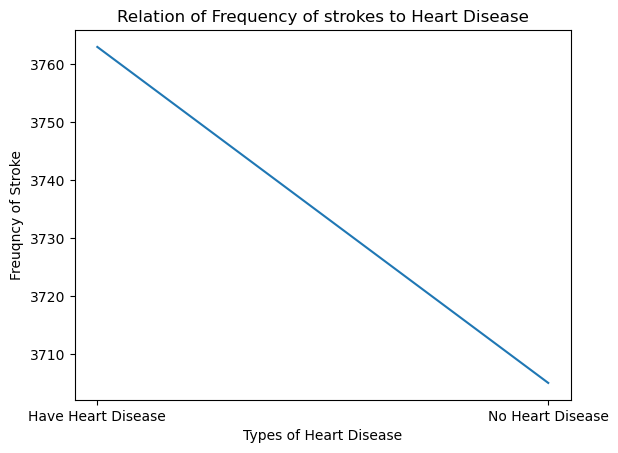

In [147]:
plt.plot(HD,HDV)
plt.title('Relation of Frequency of strokes to Heart Disease')
plt.xlabel('Types of Heart Disease')
plt.ylabel('Freuqncy of Stroke')

Text(0, 0.5, 'Freuqncy of Stroke')

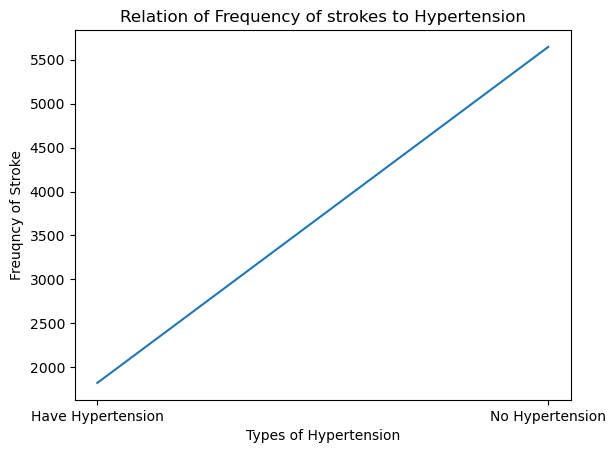

In [148]:
plt.plot(HT,HTV)
plt.title('Relation of Frequency of strokes to Hypertension')
plt.xlabel('Types of Hypertension')
plt.ylabel('Freuqncy of Stroke')

We can conclude that those with heart disease with more significantly affected with stroke than those with hypertension

Since heart disease is commonly affected by smoking and alcohol, we try to the relations

In [63]:
alsm=stroke.groupby(['Smoking Status','Alcohol Intake'])
alsm['Smoking Status'].value_counts()

Smoking Status    Alcohol Intake  
Currently Smokes  Frequent Drinker    575
                  Never               617
                  Rarely              704
                  Social Drinker      617
Formerly Smoked   Frequent Drinker    640
                  Never               604
                  Rarely              601
                  Social Drinker      607
Non-smoker        Frequent Drinker    618
                  Never               609
                  Rarely              638
                  Social Drinker      638
Name: count, dtype: int64

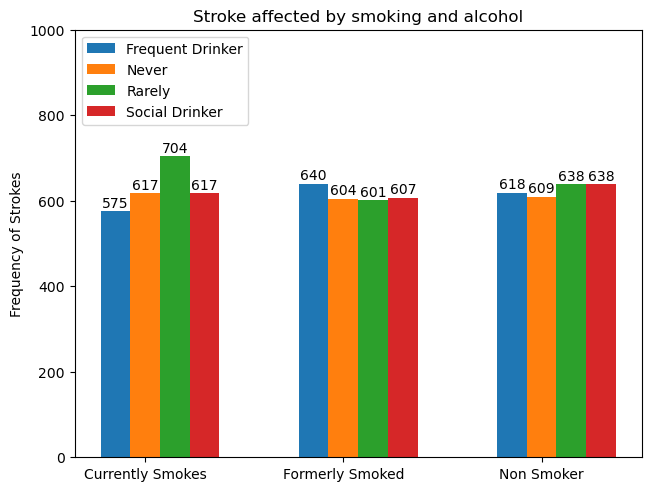

In [149]:
alcohol={'Frequent Drinker':(575,640,618),'Never':(617,604,609),'Rarely':(704,601,638),'Social Drinker':(617,607,638)}
smoking_type=['Currently Smokes','Formerly Smoked','Non Smoker']
x=np.arange(len(smoking_type))
width=0.15
multiplier =0 #change the placement for x axis names

fig, ax = plt.subplots(layout='constrained')#type of layout

for attribute, measurement in alcohol.items():#unpack the dictionary i created then create the bars in loop
    offset = width * multiplier#the distances between the x axis ( intially its 0 then +1 then so on)
    rects = ax.bar(x + offset, measurement, width, label=attribute)#plot of the bar
    ax.bar_label(rects,padding=1)#shows the values ontop of the bar, padding is the disctanc of the value to the top of the bar
    multiplier += 1
ax.set_ylabel('Frequency of Strokes')
ax.set_title('Stroke affected by smoking and alcohol')
ax.set_xticks(x + width, smoking_type)
ax.legend(loc='upper left')#placement of legends
ax.set_ylim(0, 1000)

plt.show()

We observe the first grouped bar chart, we see that even if the person rarely drinks but still smokes, it shows high number people suffers stroke

In the second grouped bar chart, we see that those who has formerly smoked and frquently drinks is highest. While the last grouped bar chart shows those who never smoked and rarely with social drinker is highest

Among the grouped bar charts, it shows that who smoking cause a vital part in stroke

I am going to relate smoking habits to heart disease

In [121]:
smoh=stroke.groupby(['Heart Disease','Smoking Status'])
smoh['Smoking Status'].value_counts()

Heart Disease  Smoking Status  
0              Currently Smokes    1262
               Formerly Smoked     1219
               Non-smoker          1224
1              Currently Smokes    1251
               Formerly Smoked     1233
               Non-smoker          1279
Name: count, dtype: int64

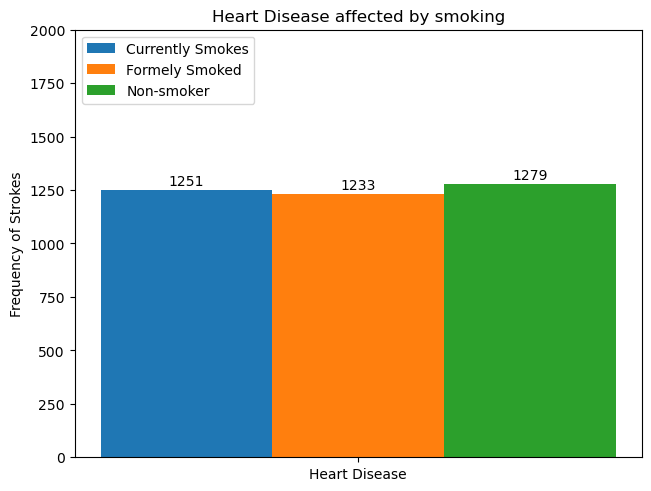

In [282]:
hdsmok={'Currently Smokes':1251,'Formely Smoked':1233,'Non-smoker':1279}
xhdsmok=['Heart Disease']
x=np.arange(len(xhdsmok))
width=0.1
multiplier =0 #change the placement for x axis names

fig, ax = plt.subplots(layout='constrained')#type of layout

for attribute, measurement in hdsmok.items():#unpack the dictionary i created then create the bars in loop
    offset = width * multiplier#the distances between the x axis ( intially its 0 then +1 then so on)
    rects = ax.bar(x + offset, measurement, width, label=attribute)#plot of the bar
    ax.bar_label(rects,padding=1)#shows the values ontop of the bar, padding is the disctanc of the value to the top of the bar
    multiplier += 1
ax.set_ylabel('Frequency of Strokes')
ax.set_title('Heart Disease affected by smoking')
ax.set_xticks(x + width, xhdsmok)
ax.legend(loc='upper left')#placement of legends
ax.set_ylim(0, 2000)

plt.show()


The differences between the smoking status are quite negligible. Thus, i can say that smoking does play a factor in heart disease.

Similarly, i will try to relate the BMI with dietary habits to heart disease

I am going to classify the bmi according to the scales
    Underweight: <18.5           Obese: >30
    Normal: 18.5-24.9
    Overweight: 25-29.9

In [164]:
underweight=stroke[(stroke['Body Mass Index (BMI)']<=18.49)]
normal=stroke[(stroke['Body Mass Index (BMI)']>=18.5)&(stroke['Body Mass Index (BMI)']<=24.9)]
overweight=stroke[(stroke['Body Mass Index (BMI)']>=25.0)&(stroke['Body Mass Index (BMI)']<=29.9)]
obese=stroke[(stroke['Body Mass Index (BMI)']>=30)]

In [165]:
underweight['Dietary Habits'].value_counts()

Dietary Habits
Keto              163
Gluten-Free       149
Vegan             148
Pescatarian       147
Vegetarian        144
Non-Vegetarian    138
Paleo             137
Name: count, dtype: int64

In [166]:
normal['Dietary Habits'].value_counts()

Dietary Habits
Non-Vegetarian    310
Vegetarian        301
Paleo             299
Keto              292
Vegan             289
Pescatarian       288
Gluten-Free       249
Name: count, dtype: int64

In [167]:
overweight['Dietary Habits'].value_counts()

Dietary Habits
Paleo             225
Non-Vegetarian    215
Vegan             206
Keto              202
Pescatarian       198
Vegetarian        197
Gluten-Free       186
Name: count, dtype: int64

In [168]:
obese['Dietary Habits'].value_counts()

Dietary Habits
Paleo             449
Vegan             436
Gluten-Free       432
Keto              417
Vegetarian        416
Non-Vegetarian    395
Pescatarian       385
Name: count, dtype: int64

Paleo : (137, 299, 225, 449)
Vegan : (148, 289, 206, 436)
Gluten-free : (149, 249, 186, 432)
Keto : (163, 292, 202, 417)
Vegetarian : (144, 301, 197, 416)
Non-vegetarian : (138, 310, 215, 395)
Pescatarian : (147, 288, 198, 385)


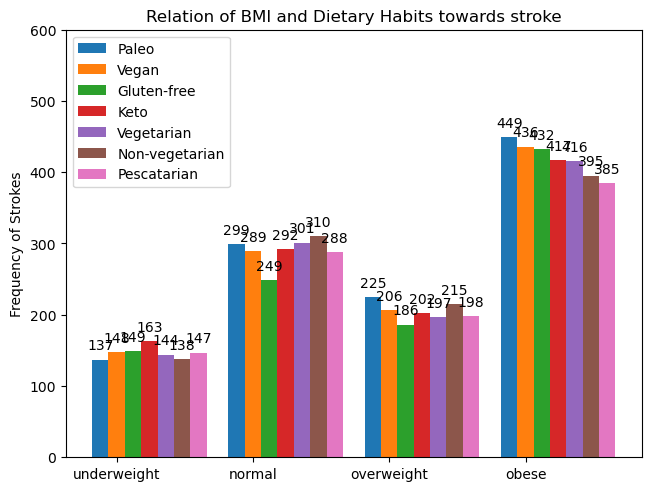

In [14]:
bmi=['underweight','normal','overweight','obese']
diets={'Paleo':(137,299,225,449),'Vegan':(148,289,206,436),'Gluten-free':(149,249,186,432),'Keto':(163,292,202,417),'Vegetarian':(144,301,197,416),'Non-vegetarian':(138,310,215,395),'Pescatarian':(147,288,198,385)}
x=np.arange(len(bmi))
width=0.12
multiplier =0 #change the placement for x axis names

fig, ax = plt.subplots(layout='constrained')#type of layout

for attribute, measurement in diets.items():#unpack the dictionary i created then create the bars in loop#the items() change the diet dictionary into tuple of key and values
    print(attribute,':',measurement)# this shows what does the items() do to the dict
    offset = width * multiplier#the distances between the x axis ( intially its 0 then +1 then so on)
    rects = ax.bar(x + offset, measurement, width, label=attribute)#plot of the bar
    ax.bar_label(rects,padding=5)#shows the values ontop of the bar, padding is the disctanc of the value to the top of the bar
    multiplier += 1
ax.set_ylabel('Frequency of Strokes')
ax.set_title('Relation of BMI and Dietary Habits towards stroke')
ax.set_xticks(x + width, bmi)
ax.legend(loc='upper left')#placement of legends
ax.set_ylim(0, 600)

plt.show()

Here we can see how remarkable difference between the obese to the other in terms of frequence of strokes.
Scientifically obese cause strokes easy because of blocked blood clots and etc.
But here we also focus on which diet that causes the obesity, which is the top three ranking:
1: Paleo Diet
2: Vegan Diet
3: Gluten-free Diet
From here i will try to relate with heart disease to see better correlation.

In [193]:
obese['Heart Disease'].value_counts()

Heart Disease
1    1482
0    1448
Name: count, dtype: int64

Text(0.5, 0, 'Types of Heart Disease')

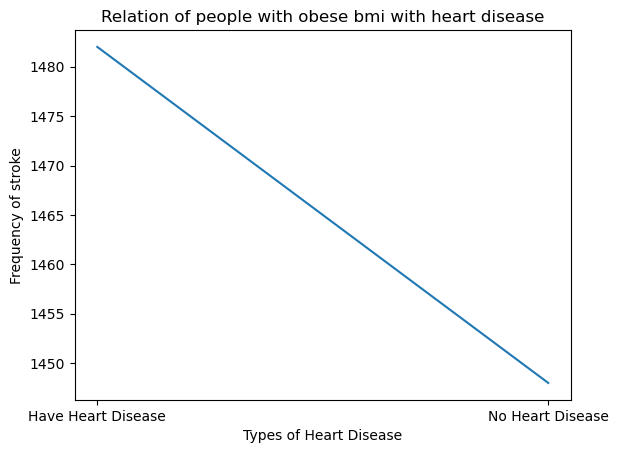

In [197]:
plt.plot(HD,obese['Heart Disease'].value_counts())
plt.title('Relation of people with obese bmi with heart disease')
plt.ylabel('Frequency of stroke')
plt.xlabel('Types of Heart Disease')

Now that we have related the heart disease with the BMI proving that the higher the BMI the higher possibility to suffer stroke

Now i would like to go back on the diets and relate with glucose level since glucose level can damage blood vessels and nerve in heart which can cause heart disease

In [213]:
heartdi=stroke[stroke['Heart Disease']==1]

In [225]:
paleo=heartdi[heartdi['Dietary Habits']=='Paleo']
vegan=heartdi[heartdi['Dietary Habits']=='Vegan']
gluten_free=heartdi[heartdi['Dietary Habits']=='Gluten-Free']

Text(0.5, 0, 'Gluten-Free')

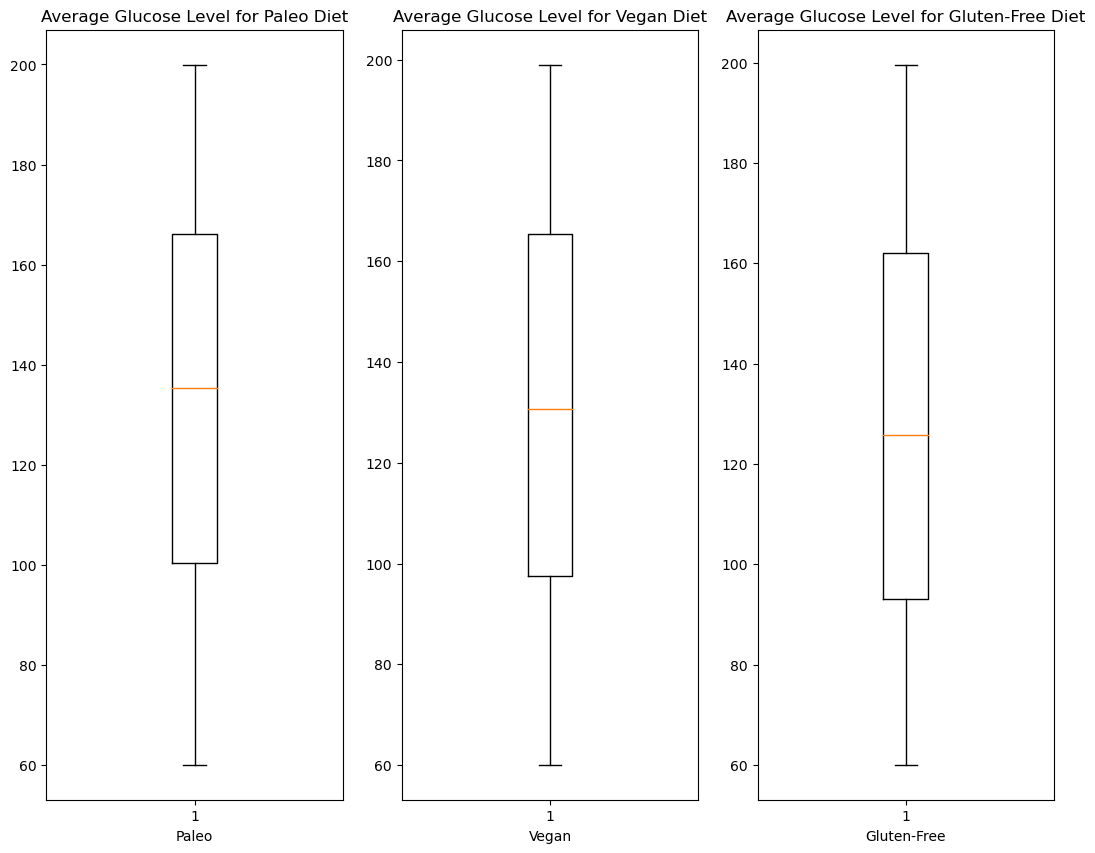

In [250]:
plt.figure(figsize=(13,10))
plt.subplot(1,3,1)#fix the placement of the graph
plt.boxplot(paleo['Average Glucose Level'])
plt.title('Average Glucose Level for Paleo Diet')
plt.xlabel('Paleo')
plt.subplot(1,3,2)
plt.boxplot(vegan['Average Glucose Level'])
plt.title('Average Glucose Level for Vegan Diet')
plt.xlabel('Vegan')
plt.subplot(1,3,3)
plt.boxplot(gluten_free['Average Glucose Level'])
plt.title('Average Glucose Level for Gluten-Free Diet')
plt.xlabel('Gluten-Free')

The median line for paleo is highest among vegan and gluten-free for average glucose level. This means larger portion of data is clustered on the median.
This could mean that the paleo diet that emphasize on meat might impact on glucose differently from vegan and gluten-free. From my research, glucose level is usually increased from carbs. Thus, the paleo diets that had been causing heart disease from high glucose level is caused most probably by certain high carbs food.

Lastly, i would like to see the top three symptoms that caused stroke

In [10]:
stroke.dropna(axis=0,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2064\2821848199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke.dropna(axis=0,inplace=True)


In [15]:
stroke.isnull().sum()

Patient ID                  0
Patient Name                0
Age                         0
Gender                      0
Hypertension                0
Heart Disease               0
Marital Status              0
Work Type                   0
Residence Type              0
Average Glucose Level       0
Body Mass Index (BMI)       0
Smoking Status              0
Alcohol Intake              0
Physical Activity           0
Stroke History              0
Family History of Stroke    0
Dietary Habits              0
Stress Levels               0
Blood Pressure Levels       0
Cholesterol Levels          0
Symptoms                    0
Diagnosis                   0
dtype: int64

In [92]:
for i,j in stroke['Symptoms'].value_counts().items():#items() breaks into tuples of keys and values
    print(i,j)


Difficulty Speaking 139
Headache 131
Numbness 129
Seizures 127
Blurred Vision 126
Dizziness 120
Severe Fatigue 119
Weakness 115
Confusion 99
Loss of Balance 96
Loss of Balance, Difficulty Speaking 20
Loss of Balance, Blurred Vision 20
Difficulty Speaking, Weakness 19
Dizziness, Seizures 18
Numbness, Difficulty Speaking 18
Confusion, Dizziness 18
Severe Fatigue, Dizziness 17
Headache, Loss of Balance 17
Seizures, Seizures 17
Dizziness, Blurred Vision 17
Numbness, Seizures 17
Difficulty Speaking, Seizures 16
Dizziness, Severe Fatigue 16
Seizures, Blurred Vision 16
Seizures, Weakness 16
Dizziness, Difficulty Speaking 16
Difficulty Speaking, Loss of Balance 16
Weakness, Headache 16
Loss of Balance, Numbness 16
Headache, Dizziness 16
Numbness, Weakness 15
Headache, Headache 15
Difficulty Speaking, Difficulty Speaking 15
Seizures, Loss of Balance 15
Weakness, Blurred Vision 15
Confusion, Difficulty Speaking 15
Numbness, Headache 15
Confusion, Numbness 15
Confusion, Loss of Balance 14
Headach

([<matplotlib.patches.Wedge at 0x2080b04e690>,
 [Text(1.0280855543865168, 0.3912033906573006, 'Difficulty Speaking'),
  Text(0.5282640708334718, 0.9648508026977274, 'Headache'),
  Text(-0.19604856861018882, 1.082388543336401, 'Numbness'),
  Text(-0.825559680569149, 0.726946499969953, 'Seizures'),
  Text(-1.0980097791922026, 0.06614019049179164, 'Blurred Vision'),
  Text(-0.9180985222512787, -0.6058837375602834, 'Dizziness'),
  Text(-0.38985845197368446, -1.0285963189826623, 'Severe Fatigue'),
  Text(0.2719420448319834, -1.0658553017425019, 'Weakness'),
  Text(0.7964081872934518, -0.7587713747974145, 'Confusion'),
  Text(1.065498686436003, -0.2733359639768469, 'Loss of Balance')],
 [Text(0.5607739387562818, 0.21338366763125485, '11.57%'),
  Text(0.2881440386364391, 0.5262822560169421, '10.91%'),
  Text(-0.1069355828782848, 0.5903937509107642, '10.74%'),
  Text(-0.4503052803104448, 0.3965162727108834, '10.57%'),
  Text(-0.5989144250139287, 0.03607646754097725, '10.49%'),
  Text(-0.500781

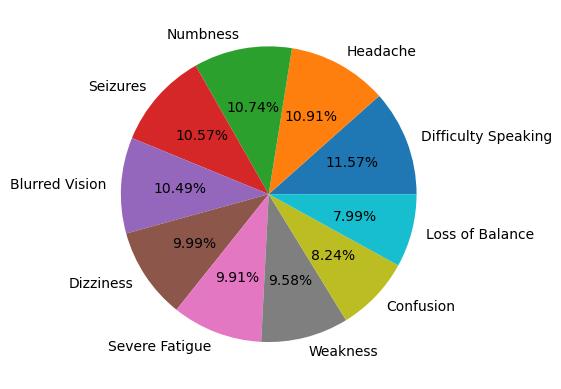

In [276]:
symptoms=['Difficulty Speaking','Headache','Numbness','Seizures','Blurred Vision','Dizziness','Severe Fatigue','Weakness','Confusion','Loss of Balance']
totalsymp=[139,131,129,127,126,120,119,115,99,96]
plt.pie(totalsymp,labels=symptoms,autopct='%1.2f%%')

Top 3 symptomps that highly bring to stroke:
1) Difficulty speaking
2) Headache
3) Numbness
    